<h1 style="color:red, margin-left: 30px;">Makine Öğrenimi ile Fiyat Tahmini: Bisiklet Örneği</h1>

<p>Bu projenin temel amacı, bisiklet fiyatlarını etkileyen ana değişkenleri belirleyerek regresyon analizi ve makine öğrenmesi yöntemleriyle bir model oluşturmak. Bu model, bisiklet fiyatlarını tahmin etmek için kullanılabilir ve bisiklet endüstrisinde fiyatlandırma stratejilerini anlamak için değerli bir araç sağlayabilir</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler 
from keras.optimizers import Adam

In [2]:
exel_verisi = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [3]:
exel_verisi.head()  # ilk 5 veri

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


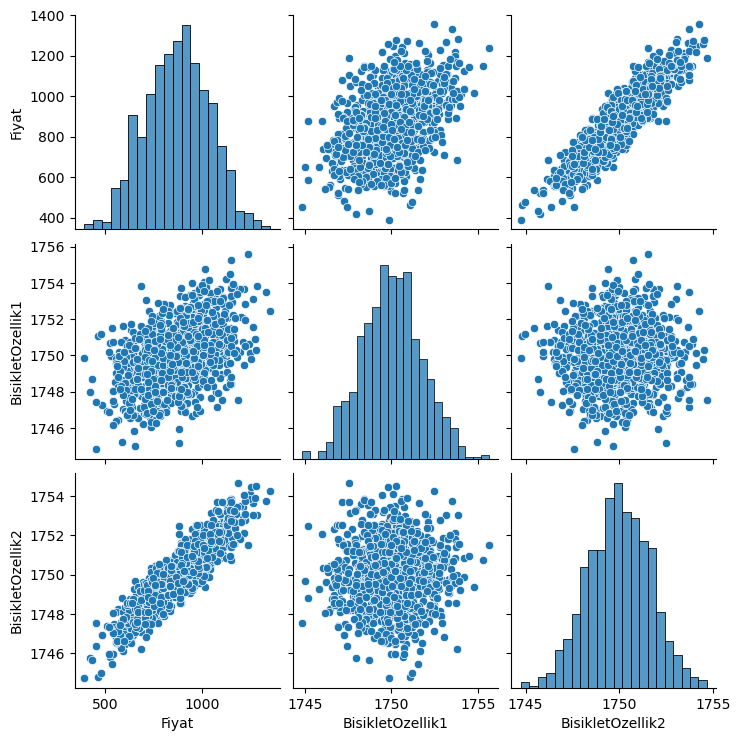

In [4]:
sbn.pairplot(exel_verisi) #genel dagılımı anlmak adına sbn.pairplot kullandım

<Axes: xlabel='Fiyat', ylabel='BisikletOzellik1'>

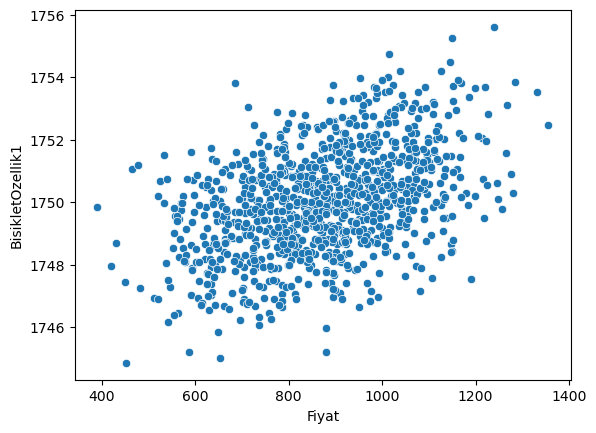

In [5]:
sbn.scatterplot(x = exel_verisi["Fiyat"],y = exel_verisi["BisikletOzellik1"])

<Axes: xlabel='Fiyat', ylabel='BisikletOzellik2'>

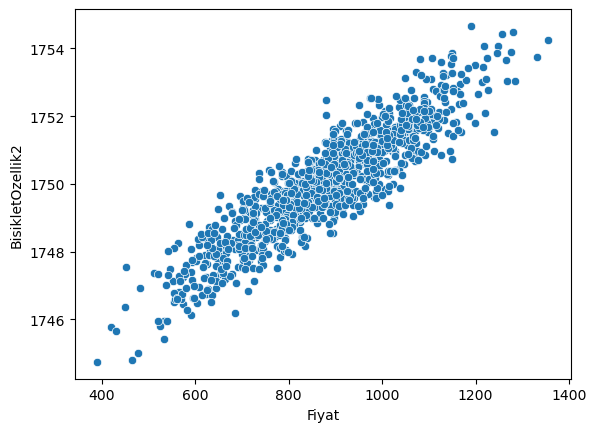

In [6]:
sbn.scatterplot(x = exel_verisi["Fiyat"],y = exel_verisi["BisikletOzellik2"])

In [7]:
#veri setinin hazırlanması

In [8]:
y_degeri = exel_verisi["Fiyat"].values 

In [9]:
x_degerleri = exel_verisi[["BisikletOzellik1","BisikletOzellik2"]].values

In [10]:
x_degerleri[0:5] #x degerleri y degerine ulaşmamaızı saglayan değişkenlerdir  örn gösterim

array([[1749.628226, 1749.590668],
       [1748.007826, 1751.824206],
       [1750.122967, 1747.977026],
       [1749.91644 , 1750.771646],
       [1750.780519, 1750.59243 ]])

In [11]:
y_degeri[0:5] # y degerleri bizim sonucumuzdur örn gösterim ilk5 değer için

array([807.6738764, 959.2275201, 718.0200329, 945.6688847, 955.5429676])

In [12]:
#veri setinin bölünmesi

In [13]:
x_train,x_test,y_train,y_test  =train_test_split(x_degerleri,y_degeri,test_size=0.40)

In [14]:
print(x_train)
print(f"x_train degerinin elaman sayisi {len(x_train)}")
print(x_train.shape)

[[1751.228629 1748.738217]
 [1751.620403 1746.129684]
 [1751.335327 1750.597834]
 ...
 [1752.187383 1750.689251]
 [1747.150876 1752.538269]
 [1750.999308 1748.948558]]
x_train degerinin elaman sayisi 600
(600, 2)


In [15]:
print(x_test[0:5]) #ÖRNEK GÖSTERMEK ADINA İLK 5 ELAMANI ALDIM
print(f"x_train degerinin elaman sayisi {len(x_test)}")
print(x_test.shape)

[[1752.483231 1749.834131]
 [1751.082589 1751.958339]
 [1753.274767 1748.56464 ]
 [1752.540381 1747.98331 ]
 [1751.04486  1750.004684]]
x_train degerinin elaman sayisi 400
(400, 2)


In [16]:
#x_train ve x_test degerlerini 0-1 aralıgına alarak performansı arttırmamız gerekiyor bundan dolayı

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(x_train)

MinMaxScaler()

In [19]:
x_train = scaler.transform(x_train)
#Bu işlem, modelin eğitim verileri üzerinde daha iyi performans göstermesine katkıda bulunabilir.
#Bu ölçekleme işlemi, genellikle eğitim verilerini ölçeklendirdikten sonra test verilerini 
#aynı ölçeklendirme kurallarına tabi tutarak devam ettirilir.

In [20]:
x_train[0:10]

array([[0.58676673, 0.39843139],
       [0.62368455, 0.13371159],
       [0.59682114, 0.58714951],
       [0.56767025, 0.73525504],
       [0.76049384, 0.5711965 ],
       [0.55475399, 0.54686826],
       [0.56222908, 0.22862642],
       [0.37624251, 0.3840476 ],
       [0.59915264, 0.70867998],
       [0.7498616 , 0.7134189 ]])

In [21]:
scaler.fit(x_test)

MinMaxScaler()

In [22]:
x_test = scaler.transform(x_test)
#Bu işlem, modelin eğitim verileri üzerinde daha iyi performans göstermesine katkıda bulunabilir.
#Bu ölçekleme işlemi, genellikle eğitim verilerini ölçeklendirdikten sonra test verilerini 
#aynı ölçeklendirme kurallarına tabi tutarak devam ettirilir.

In [23]:
x_test[0:10] #örn gösterim ilk 10 değer için

array([[0.73238628, 0.52266164],
       [0.59796164, 0.74070922],
       [0.80835283, 0.3923498 ],
       [0.73787117, 0.33267693],
       [0.59434065, 0.54016872],
       [0.4471115 , 0.33070412],
       [0.70076375, 0.37906242],
       [0.73672131, 0.57845213],
       [0.56217376, 0.19501728],
       [0.2924896 , 0.70443567]])

In [24]:
#model oluşturma aşaması

In [69]:
model = Sequential() 


model.add(Dense(5,activation="relu"))  
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))


model.add(Dense(1))

model.compile(optimizer="adam",loss="mse") 

model.fit(x_train,y_train,epochs=400,verbose=0)

In [70]:
hata_grafigi = model.history.history["loss"]

<Axes: >

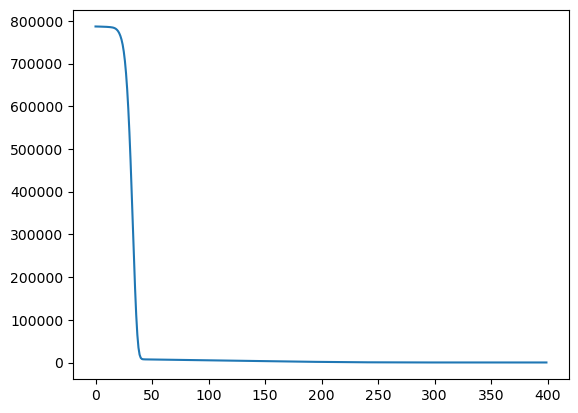

In [71]:
sbn.lineplot(x=range(len(hata_grafigi)),y = hata_grafigi)

In [72]:
test_tahminleri = model.predict(x_test)

13/13 [==============================] - 0s 1ms/step


In [73]:
tahmin_degeri = pd.DataFrame(y_test,columns=["gercek_deger"])

In [74]:
tahmin_degeri

,gercek_deger
0,960.659897
1,1092.273347
2,888.025577
3,799.261737
4,920.678359
...,...
395,478.507116
396,1163.832937
397,1100.486458
398,852.773829


In [75]:
tahmin_degeri["model_tahmini"] = np.array(test_tahminleri)

In [76]:
tahmin_degeri

,gercek_deger,model_tahmini
0,960.659897,983.310059
1,1092.273347,1115.863037
2,888.025577,902.228882
3,799.261737,820.210938
4,920.678359,939.689026
...,...,...
395,478.507116,497.236664
396,1163.832937,1197.477661
397,1100.486458,1126.556152
398,852.773829,880.202515


<Axes: xlabel='gercek_deger', ylabel='model_tahmini'>

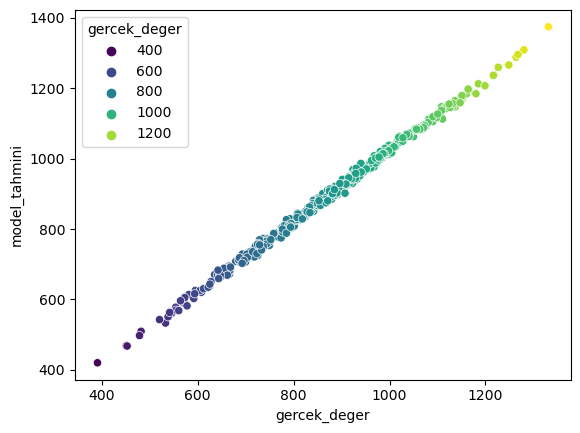

In [77]:
sbn.scatterplot(x="gercek_deger", y="model_tahmini", hue="gercek_deger", data=tahmin_degeri, palette="viridis")

In [78]:
#hata sapma oranını : 
from sklearn.metrics import mean_absolute_error

mean_absolute_error(tahmin_degeri["gercek_deger"],tahmin_degeri["model_tahmini"])
#modelimizde +-11.447093777962891 sapma mevcuttur

22.135579497137698

In [79]:
tahmin_degeri.describe()

,gercek_deger,model_tahmini
count,400.000000,400.000000
mean,874.576417,896.684692
std,162.533516,164.003296
min,390.856887,419.848175
25%,774.800585,791.295197
50%,883.215162,902.403442
75%,981.778764,1008.148483
max,1331.139279,1374.574097


In [80]:
#yeni tahminlerde bulunalım 

833,9206369 =  1750,033229	1749,427281 exelden alınan örnek


In [81]:
yeni_bisilet_özellik = [[1750.033229,1749.427281]]
yeni_bisilet_özellik2 = [[1748.656426,1752.539962]]

In [82]:
veri = scaler.transform(yeni_bisilet_özellik)

In [83]:
veri

array([[0.49725079, 0.48089894]])

In [84]:
model.predict(veri)

1/1 [==============================] - 0s 21ms/step


array([[846.6756]], dtype=float32)

örnek1 : model tahmini  = 840.2836 iken gerçek degerimiz = 846.6756

örnek2 : model tahmini  = 1091.9861 iken gerçek degerimiz = 1053.4865

In [85]:
#model kaydetmek için:
from tensorflow.keras.models import load_model

In [86]:
model.save("bisiklet_modeli.keras")

In [87]:
loaded_model = load_model('bisiklet_modeli.keras') #modeli yükledmim


In [88]:
kontrol_verisi =  [[1750,1750]] #var olmayan bir bisiklet denendi
kontrol_verisi  = scaler.transform(kontrol_verisi)
kontrol_verisi

array([[0.49406168, 0.53968791]])

In [89]:
loaded_model.predict(kontrol_verisi)

1/1 [==============================] - 0s 71ms/step


array([[896.5089]], dtype=float32)